# 1. Forward Propagation - 1

**Now we want our Algorithms to learn those weights that we were handpicking previously.**

For that we need to decide what is the architecture of the Neural Network.  
So a simple NN is which does not have any hidden layer.  
So it means it will have Only Input layer and output layer.  
More than that, it will have hidden layer.  
We need some weights to reach to the output layer.  
So lets write some code for it.

In [3]:
import numpy as np

In [4]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([0,0,0,1])

Currently Y has 4 columns and 1 row, we want 1 column and 4 rows. So we make it 2d and take Transpose of it.

In [5]:
Y = np.array([[0,0,0,1]]).T

In [7]:
X.shape, Y.shape

((4, 2), (4, 1))

So now we have 4 rows with 2 inputs each and 4 rows with 1 output each.  
**Now we are making simple NN as discussed above**

In [9]:
def sigmoid(z):
    return 1/ (1+ np.exp(-z))

Now we need to Initialize the Weights.  
So we initialize it using random module.  
So we need to decide the shape of the random weights as we have the input data in 2d format.  
So the shape that we want will be of 2 x 1.  
Ideally what we should do is we should initialize our weights from -1 to 1.  
We need our weights to be negative as well.  
To do that, first we need to multiply it by 2 because the range is in between 0 to 1, so the range becomes 0 to 2.  
So from 0 to 2, it moves from -1 to 1.  

In [11]:
weights = 2 *np.random.random((2, 1)) - 1
weights

array([[ 0.79824125],
       [-0.90473035]])

Lets pick the bias,  
In our case,  we need only one bias.  
Lets say we have 3 hidden layer unit and one output unit, for each of these unit, bias will have different value.  


In [12]:
bias = 2 * np.random.random(1) - 1

In [13]:
bias, weights

(array([0.14106776]),
 array([[ 0.79824125],
        [-0.90473035]]))

This is the case when we have no hidden layer.  
We haev our input value as [[0 0], [0,1], [1,0], [1,1]], and weights as [[w1, w2]].  
What we can do is we can multiply the dot product of input and weights.  
SO input is 4 x 2 and weights is 2 x 1. So we got the output in 4 x 1 matrix.  



In [15]:
output0 = X  # this is our input layers output.
output = sigmoid(np.dot(output0, weights) + bias)   # we need to multiply weights with x.

In [16]:
output


array([[0.53520857],
       [0.31785161],
       [0.71896006],
       [0.5086438 ]])

# 2. Forward Propagation - 2
How do we apply forward propogation if we have hidden layer.  
Here we focus on only one hidden layer.  
Almost all the codes from above is same only we need to change the last two cell.

In [18]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([0,0,0,1])
Y = np.array([[0,0,0,1]]).T

In [19]:
def sigmoid(z):
    return 1/ (1+ np.exp(-z))

What all we require is we require  
1. Hidden Layer Weights
2. Hidden Layer Bias
3. Output Layer Weights  
4. Output Layer Bias.  

In [22]:
wh = 2 * np.random.random((2,2)) - 1  # (2, 2) means first 2 in the input layer and second 2 in the hidden layer
                                      # and we take it to be -1 to 1.  
    
bh = 2 * np.random.random((1,2)) - 1  # At the hidden layer we require 2 biases and no of biases is 1 so we take (1,2).
wo = 2 * np.random.random((2,1)) - 1  # we have two units in the hidden layer which are going to one output unit.
bo = 2 * np.random.random((1,1)) - 1  # we have only one bias on the hidden layer and only one unit on the output layer.

To understand the outputHidden, we need to understand the matrix multiplication.

In [23]:
output0  = X
outputHidden = sigmoid(np.dot(output0, wh) + bh)   # this is from input to hidden layer.
output = sigmoid(np.dot(outputHidden, wo) + bo)   # this is from hidden layer to output layer.
output

array([[0.58886316],
       [0.59242934],
       [0.59671592],
       [0.60098792]])

# 3. Error Function in Gradient Descent


What exactly we need to do to update the weights to apply the backpropogation to calculate the error and then backpropogate that error through our Neural Network to update all the weights that we have to eventually reach optimal weight value. 

**Lets say we have a NN with Hidden layer, we pass the Input, we get some outputs, the outputs are not really what we wants to be, We will calculate the error, or the cost, and we want to update the weights, so that this cost is minimized.**

While learning linear regression what we had is cost value and we optimized our weights so that the cost is minimised.

The better way of doing this is Gradient Descent.  

Gradient Descent says that lets say it looks like
this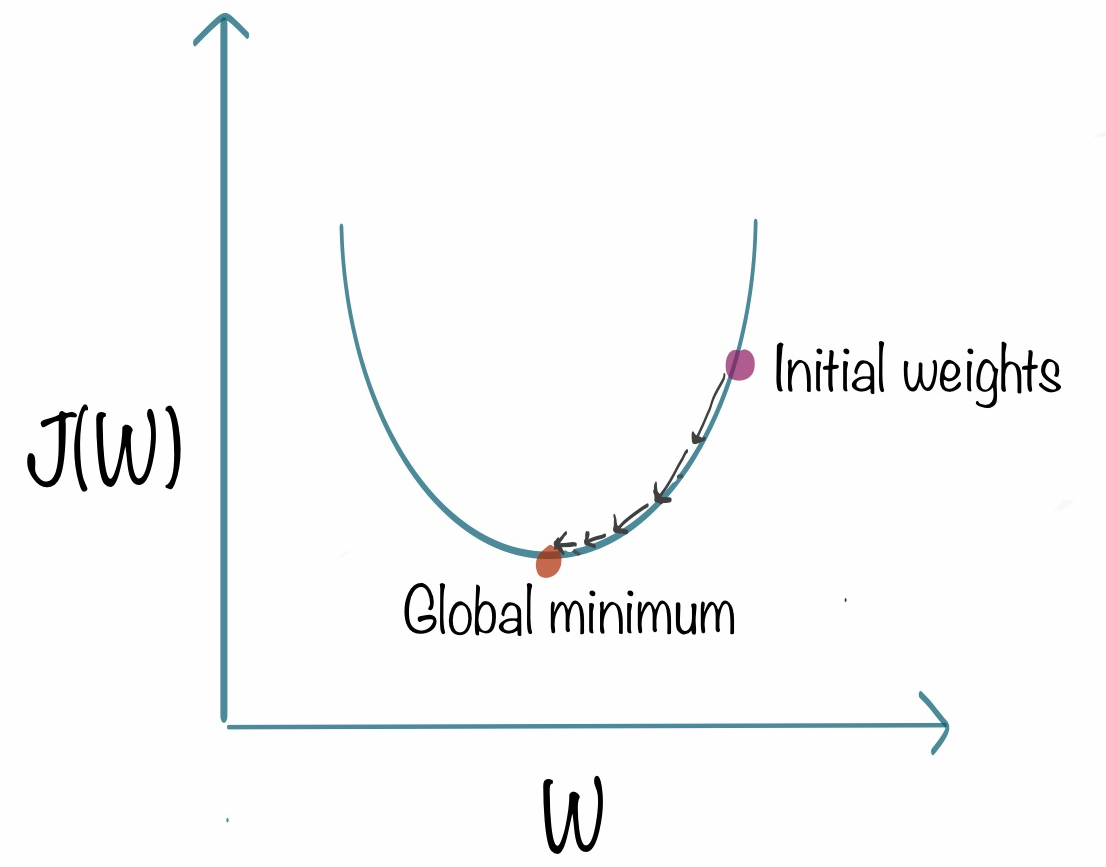


Global Minima is where you want to get to, and the idea was in the Right side, the gradient was positive, on the left hand, it was Negative.  
To update weights, we do something like,  
$$ w = w - \alpha \frac{\partial E}{\partial w} $$ where $\alpha$ is the learning rate.  
If the value is +ve, we need to reduce our weights, on the other hand, if we are on the left hand from the minima, that means your slope is negative, and because $\frac{\partial E}{\partial w}$ becomes negative and we will end up adding the weights, and adding the weeights value we will start moving towards right.  
What we need to do is we need to decide the Error Function.  
What we need to do is we need to calculate these slopes $\partial E$  w.r.t  $w$ and w.r.t every bias as well. ($\frac{\partial E}{\partial b}$)

Lets say we define the bias unit to be going from ith unit to jth unit which is $w_{ij}$, so we need to find out $\frac{\partial E}{\partial w_{ij}}$.  
For the bias, lets say its value is 1, and it is going to the jth unit so it is $b_j$ or $w_{0j}$ which means first unit going to the jth.

So we need to calculate $\frac{\partial E}{\partial w_{ij}}$, So the error function that we are going to use is  

$$ E = \sum_{i = 0} ^ m \frac{1}{2} (y_a - y_p)^2 $$ where m is no of training datapoints.  
So we need to find out derivative of this Error function w.r.t each $w_{ij}$.  
We can find $y_p$ using forward propogation, $y_a$ is something we already we know so we can find the error function.

# 4. Derivative of Sigmoid Function


$$sigmoid(z) = \frac {1}{ 1 + e^{-z}}$$  

So what is the derivative of Sigmoid Function $\frac{\partial sig(z)}{\partial z}$.  
 
$$So,=>\frac{\partial sig(z)}{\partial z} = \frac{\partial sig(z)}{\partial (1 + e ^{-z})} *  \frac{\partial (1+e^{-z})}{\partial z}$$
Now, $\frac{\partial sig(z)}{\partial (1 + e ^{-z})}$ is like we want to take derivative of $\frac{\partial \frac{1}{x}}{x}$, which is equal to $-\frac{1}{x^2}$, so the equation becomes,  
$$ => -\frac{1}{(1+e^{-z})^2} * (0 + (-e^{-z}))$$  
Above can be written as , 
$$ => -\frac{1}{(1+e^{-z})} * \frac{(e^{-z})}{1 + e^{-z}} \quad which \ is => Sig(z)(1 - \frac{1}{1 + e^{-z}})$$ 

----------------------------------------------------------------------------------------------
$$=> \frac{\partial Sig(z)}{z} = Sig(z)(1 - Sig(z))$$.  

In [24]:
# code of this derivative is 
def derivativeSig(z):
    return sigmoid(z)*(1 - sigmoid(z))


# 5. Math behind Backpropagation - 1

Now we need to find how do we take a derivative of Error Function wrt weight $w_{ij}$.  
$w_{ij}$ means we have unit $i$, its going to unit $j$ and thats the weight that is defined.  
Input $j$ is the combined input comming into $j$. And we call it $O_j$ and we call output of ith unit as $O_i$.

We need to find out $\frac{\partial E}{\partial w_{ij}}$ of the Error Function where error function is $ E = \sum_{i = 0} ^ m \frac{1}{2} (y_a - y_p)^2 $.  
The Error eventually depends upon $y_p$.  
How is $y_p$ getting effected by $w_{ij}$.  
$w_{ij}$ is effecting the input going to $j$ that is changing the output of $O_j$ and that is effectively changing the $y_p$(Think on the basis of Forward propogation).  
So lets break this derivative into multiple parts.  
$$=>\frac{E}{w_{ij}} = \frac{\partial E}{\partial O_j} \frac{O_j}{w_ij}$$   
This means Error is effected by output($O_{j}$) and output is effected by weights ($w_{ij}$). This can further breaks into    
$$=>\frac{E}{w_{ij}} = \frac{\partial E}{\partial O_j} \frac{O_j}{w_ij} => \frac{\partial E}{\partial O_j} \frac{\partial O_j}{\partial input j} \frac{\partial input j}{\partial w_{ij}}$$


This means Error is effected by output($O_{j}$) and output is effected by input comming from $j$ and input is getting effected because the weight we have .  

Now how do we find out these three components?   
We have seen some of the mathematics to calculate $\partial O_j$ and $\partial input j$, so we will focus on last two parts before the first part.

# 6. Math behind Backpropagation - 2


$$=>\frac{E}{w_{ij}} =  \frac{\partial E}{\partial O_j} \frac{\partial O_j}{\partial input j} \frac{\partial input j}{\partial w_{ij}}$$

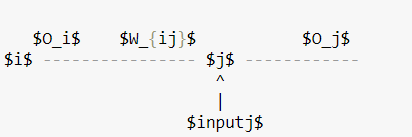


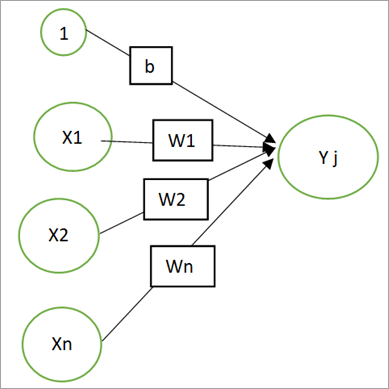

Inputj is defined as lets say we have l units from which it is getting the input and one of them is bias as well.  
So, $$InputJ = \sum_{i = 1}^l w_{ij}O_i$$  
Lets Say there are l units which it is getting input, thats basically what our inputj is. And we assume one of them as bias as well.  
For the bias one, output $O_i$ is 1 and $w_{ij}$ will be the bias term.  
Thats the inputj that we get from l inputs that it had in previous layers.  
So what is $\frac{\partial inputj}{w_{ij}}$ = ?  
So when we take derivative of $ \sum_{i = 1}^l w_{ij}O_i$ wrt $w_{ij}$ ,  $\frac{\partial w_{ij} O_i}{\partial w_{ij}}$, everything else is independent except ith component.  
So lets say if we look at $w_{23}$, that is the input coming from the second unit in the previous layer(2nd layer) going to the third  layer.  
So this weight $w_{23}$ is not effecting any other weights such as $w_{13}$, $w_{33}$ or any outputs, its only effecting the contribution of the 2nd unit to the next layer particular unit.  
So, $\frac{\partial w_{ij} O_i}{\partial w_{ij}}$ =$O_i$ that is output of the ith unit.  
So we know the third part which is, $$\frac{\partial inputj}{\partial w_{ij}} = O_i$$

-----------------------------------------------------------------------------------------------------------------------------
So what is $\frac{\partial O_j}{\partial input j}$? To figure this out, what is $O_j$?  
$O_j$ is basically $sigmoid(inputj)$.  
Output j($O_j$) is whatever the input it is getting its summation(from the previous layer), and then we need to apply sigmoid function to get to the $O_j$.  
So we have seen that derivative of sigmoid is $sigmoid(z)(1-sigmoid(z))$.  
So $$\frac{\partial O_j}{\partial input j} = sigmoid(inputj)(1 - sigmoid(inputj))$$ 
which is equal to 
$$\frac{\partial O_j}{\partial input j} = O_j(1-O_j)$$.

------------------------------------------------------------------------------------------------------------------------

So how do we find these outputs $O_j$? We already know these outputs when we apply the Forward Propogation, thats when we calculate these outputs.  
So we know the $O_i$, $O_j$.  
Now we need to find $$\frac{\partial E}{\partial O_j}$$

# 7. Math behind Backpropagation - 3


Now we need to find $$\frac{\partial E}{\partial O_j}$$.  
For now, lets think of Output Layer Units.  
Lets assume jth layer unit is output layer unit.  
For Output layer unit, what is $O_j$?  
So the output of $O_j$ is $y_p$ (Y predicted).  
So what is $\frac{\partial E}{\partial O_j}$?  
$$\frac{\partial E}{\partial O_j} = \frac{\partial (\sum \frac{1}{2}(y_a - y_p)^2 )}{\partial y_p}$$  
On derivating, 
$$ => (y_a - y_p)(-1) $$
  
$$ => \sum(y_p - y_a)$$  where sigma is over all training datapoints.  


Thats the first part for just output layer units.  
We dont know how to find this for inner layer as of now.  


So lets forget about the summation because we will require summation over all of these.  
So we will do summation when we find this differentiation $\frac{\partial E}{\partial O_j}$

For each individual training datapoints, we will have first part as $(y_p - y_a)$, second part as $O_j(1-O_j)$, the third part as $O_i$.  
To find the overall derivative, we will sum it all datapoints.

# 8. Implementing a simple Neural Network


So we divided our derivatives into three parts.  
$$\frac{E}{w_{ij}} =  \frac{\partial E}{\partial O_j} \frac{\partial O_j}{\partial input j} \frac{\partial input j}{\partial w_{ij}}$$  
where $$\frac{\partial E}{\partial O_j} = y_p - y_a$$
  
$$\frac{\partial O_j}{\partial input j} = O_j(1-O_j)$$
and 
$$\frac{\partial input j}{\partial w_{ij}} = O_i$$

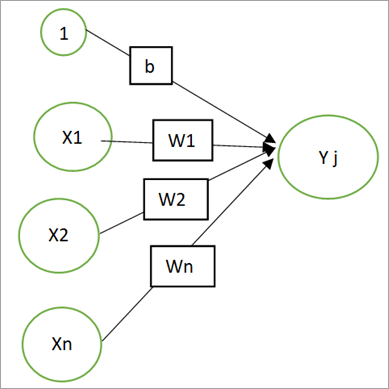
Now we focus on Neural Network which does not have any hidden layer.  
Now we do forward propogation, using forward propogation, we will pick some weights, find $y_p$.  
Using this $y_p$, we will find out $\frac{\partial E}{\partial O_j}$, then we will find out the middle term which is $\frac{\partial O_j}{\partial input j}$ and we already know what is the output of the first Input layer, using that we will find $O_i$.  
  
For clarity, we will call it $w_{11}$ and $w_{21}$ which means $w_{11}$ is going from the first unit of first layer to first unit of second layer and  $w_{21}$  is going from the second unit of first layer to first unit of second layer.  
So our training data looks like 
$X = 
\begin{bmatrix}
0 \ 0 \\
0 \ 1 \\
1 \ 0 \\
1 \ 1 \\
\end{bmatrix}
$


$=> 
\begin{bmatrix}
x_1^1 \ \ x_2^1 \\
x_1^2 \ \  x_2^2 \\
x_1^3 \ \  x_2^3  \\
x_1^4 \ \  x_2^4 \\
\end{bmatrix}
$  


So if we look very closely, the first two parts are going to be the same, because they depend only on output and not on input.  
So the first row that goes in(datapoint), whether we are calculating the differentiation wrt $w_{11}$ or $w_{21}$, it does not matter for the first two entries.  
They are just depending upon the actual output that we get.  
So what we will do is we will first find the first term, we will find the second term, First term is $y_p - y_a$, so it will look like, $\begin{bmatrix}
\end{bmatrix}
$
of 4 rows and 1 column and second term is $O_j(1-O_j)$ will be exactly like this 4 rows and 1 column, we will multiply both of these and we will get the first two term will be your 4x1 matrix.  
Now once we have this value, in case of $w_{11}$, we are supposed to multiply with $O_1$, which is our feature 1.  
In case of $w_{21}$, we are supposed to multiply with the feature 2 which is $O_2$.  
So we will do this 

$$
\begin{bmatrix}
ft_1 * x_1^1 \\
ft_2 * x_1^2 \\
ft_3 * x_1^3 \\
ft_4 * x_1^4  \\
\end{bmatrix}
$$

This is for $w_{11}$.  
For $w_{21}$, 
$$
\begin{bmatrix}
ft_1 * x_2^1 \\
ft_2 * x_2^2 \\
ft_3 * x_2^3 \\
ft_4 * x_2^4  \\
\end{bmatrix}
$$

So lets find the first two terms then we will write other.

In [25]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([0,0,0,1])
Y = np.array([[0,0,0,1]]).T

In [26]:
def sigmoid(z):
    return 1/ (1+ np.exp(-z))

In [27]:
def derivativeSig(z):
    return sigmoid(z)*(1 - sigmoid(z))

In [37]:
weights = 2 *np.random.random((2, 1)) - 1
bias = 2 * np.random.random(1) - 1
lr = 0.01

In [34]:
output0 = X  # this is our input layers output.     (w*x)
output = sigmoid(np.dot(output0, weights) + bias)   # we need to multiply weights with x.

## lets find the first term
first_term = output - Y

## in the derivative sigmoid, it takes the inputj
# so we find input for last layer.
input_for_last_layer = np.dot(output0, weights) + bias

second_term = derivativeSig(input_for_last_layer)

# finding first two terms 
first_two = first_term * second_term
first_two.shape

(4, 1)

Thats what we are expecting for first two term which is of 4 x 1.  
Now, we need to multiply $w_{11}$ with feature 1 and $w_{21}$ with feature 2.  


In [36]:
# this for loop will go through both features one by one.
# then we will go through each of the rows one by one.  
# then we need to do summation, for summation, we need to create an array where we store this sum value.  
# We need to take as same dimensions as the weights are because this are the changes that we need to apply in our weights.  
# we need to change the weights.

changes= np.array([[0.0], [0.0]])
for i in range(2):
    for j in range(4):
        changes[i][0] += first_two[j][0] * output0[j][i]  # 0 at the end is because we only have one column in weights
        
# also we need to update the weights
# and it does not have to be direct subtraction, it has to be multiplied with learning rate.
weights = weights - lr*changes

Thats how we change the weights as we discussed above.  
We also need to change the bias.   
So in the bias, only thing changing is output0[j][i] = 1 because thats the bias output.  
And we have only one bias so we dont need the first forloop.  

In [39]:
bias_change = 0.0
for j in range(4):
    bias_change +=first_two[j][0] * 1 #output0[j][i] thats the bias change that we require.
    
bias = bias - lr*bias_change

Ofcourse this is gradient descent so we need to run it many times.  

In [41]:
for i in range(10000):
    output0 = X  
    output = sigmoid(np.dot(output0, weights) + bias)   

    first_term = output - Y

    input_for_last_layer = np.dot(output0, weights) + bias

    second_term = derivativeSig(input_for_last_layer)

    first_two = first_term * second_term
    changes= np.array([[0.0], [0.0]])
    for i in range(2):
        for j in range(4):
            changes[i][0] += first_two[j][0] * output0[j][i] 
    weights = weights - lr*changes
    bias_change = 0.0
    for j in range(4):
        bias_change +=first_two[j][0] * 1
    bias = bias - lr*bias_change
    
# once we done runnning, we need to check the weights, bias and callculate the output

output = sigmoid(np.dot(X, weights) + bias) # instead of output0, we need to pass X because it is the recent entry after 
                                            # changing the weights and bias.
    
weights, bias, output

(array([[3.47053277],
        [3.4705037 ]]),
 array([-5.31499689]),
 array([[0.00489323],
        [0.13652076],
        [0.13652418],
        [0.83562638]]))

Output is the third entry, Output we expected is 0,0,0,1 but it came very close to it.  
We can increase the score more by changing the iterations and the learning rate.  

# 9. Optimizing our code using Vectors Operations


So if we look closely, we have these two arrays,  
$
\begin{bmatrix}   
x_1^1 x_2^1 \\
x_1^2 x_2^2 \\
x_1^3 x_2^3  \\
x_1^4 x_2^4 \\
\end{bmatrix}
$  
This is the output0 which is the input layer,

$
\begin{bmatrix}
ft_1  \\
ft_2 \\
ft_3 \\
ft_4  \\
\end{bmatrix}
$


This is the first two terms,  
To find change in $w_{11}$, we do,  

$
\begin{bmatrix}
ft_1 * x_1^1 \\
ft_2 * x_1^2 \\
ft_3 * x_1^3 \\
ft_4 * x_1^4  \\
\end{bmatrix}
$  

For $w_{21}$,  
  
$
\begin{bmatrix}
ft_1 * x_2^1 \\
ft_2 * x_2^2 \\
ft_3 * x_2^3 \\
ft_4 * x_2^4  \\
\end{bmatrix}
$

Now, to achieve the same thing, we need to do is take transpose of  $
\begin{bmatrix}   
x_1^1 x_2^1 \\
x_1^2 x_2^2 \\
x_1^3 x_2^3  \\
x_1^4 x_2^4 \\
\end{bmatrix}
$  ,  
Which then becomes, 
$
\begin{bmatrix}   
x_1^1  x_1^2  x_1^3  x_1^4 \\
x_2^1  x_2^2  x_2^3  x_2^4 \\
\end{bmatrix}
$  .

Now, if we take the dot product of $
\begin{bmatrix}   
x_1^1  x_1^2  x_1^3  x_1^4 \\
x_2^1  x_2^2  x_2^3  x_2^4 \\
\end{bmatrix}
$ and $
\begin{bmatrix}
ft_1  \\
ft_2 \\
ft_3 \\
ft_4  \\
\end{bmatrix}
$, so the result if we see one is 2 x 4 and one is 4 x 1, so the resultant will be 2 x 1 which we require.  


In [43]:
for i in range(10000):
    output0 = X  
    output = sigmoid(np.dot(output0, weights) + bias)   

    first_term = output - Y

    input_for_last_layer = np.dot(output0, weights) + bias

    second_term = derivativeSig(input_for_last_layer)

    first_two = first_term * second_term
    changes= np.dot(output0.T, first_two)  # thats what we need to change instead of a for loop
    weights = weights - lr*changes
    
    # in case of bias, again we dont have to write the for loop. 
    # what we doing in bias is we are adding the four entries in first two.
    bias_change = np.sum(first_two)
    bias = bias - lr*bias_change
    

output = sigmoid(np.dot(X, weights) + bias) # instead of output0, we need to pass X because it is the recent entry after 
                                            # changing the weights and bias.
    
weights, bias, output

# results are almost same as we saw above.  

(array([[3.99344162],
        [3.99343814]]),
 array([-6.09308327]),
 array([[0.00225335],
        [0.10913132],
        [0.10913166],
        [0.8691878 ]]))

$\frac{\partial E}{\partial O_j}$ is going to be different for Hidden Layer.

# 10. Total Derivatives


Lets say we have a function $f(x, y, z)$, and we want to find derivative wrt some constant lets say k, 
$$\frac{\partial f(x, y, z)}{\partial k}$$,  
So it will be equal to $$\frac{\partial f(x, y, z)}{\partial x} \frac{\partial x}{\partial k} + \frac{\partial f(x, y, z)}{\partial y} \frac{\partial y}{\partial k} + \frac{\partial f(x, y, z)}{\partial z} \frac{\partial z}{\partial k}$$

Lets say we want to find derivative of $x^5$ wrt x, So lets say $y$ = $x^2$ and $z$ = $x^3$.  
So, it becomes $$\frac{\partial yz}{x} = \frac{\partial yz}{\partial y}\frac{\partial y}{\partial x} + \frac{\partial yz}{\partial z}\frac{\partial z}{\partial x}$$

now, $\partial y$ = $x^2$ and $\partial z$ = $x^3$, so substituting, we get
$$=> z(2x) + y(3x^2) $$  
$$=> x^3*2x + x^2*3x^2$$  
$$=> 5x^4$$,  
exactly what we want to reach to.  


# 11. Math behind Backpropagation


We wanted to find,  
$$ \frac{\partial E}{\partial O_j} \frac{\partial O_j}{\partial input j} \frac{\partial input j}{\partial w_{ij}}$$.  
$\frac{\partial O_j}{\partial input j} \frac{\partial input j}{\partial w_{ij}}$ is something that we have found in general for every unit.  
For $ \frac{\partial E}{\partial O_j}$ , we have already found that in case of an output unit(unit in an output layer), it is $y_p - y_t$.  
So how do we find $ \frac{\partial E}{\partial O_j}$ in case of a unit in hidden layer?  
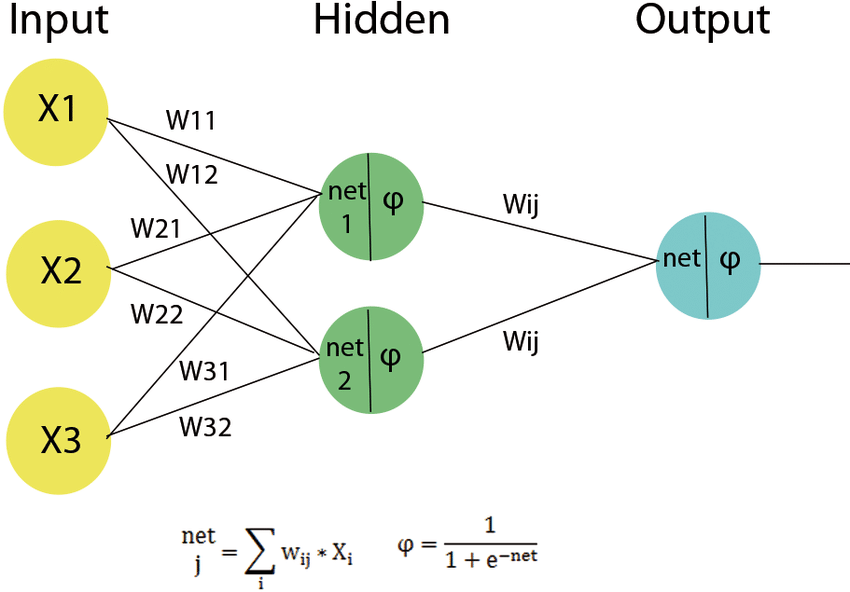

Lets say our neural network looks like this.  
Lets say x2 is $j$.  
We need to find how is the error changing wrt to the output of this unit?  
SO x2 output does not directly change the final output, that we will get.  
It does not change the eerror directly, this output will have effect on inputs of hidden layer and that input will have effect on the output of these units(hidden layer units) and output of hidden layer unit will have effect on the final output of our neural network.  
So it does not directly effect the output, It has indirect implication through the way that it is changing the input of the next layer and that is having the effect upon the error eventually.  

So the idea is $\frac{\partial E}{\partial O_j}$ is not really directly effected.  
Lets say we have k units in the hidden layer.  
The error is dependent upon $input1$, $input2$, .... $inputk$ which is the input going these k units(Of the Hidden, next layer after the jth unit). So the error is the function of these k.  
$$\frac{\partial E(input_1, input_2...input_k)}{\partial O_j}$$.  
So $O_j$ has effect upon these units and these units have effect upon the actual error.  
So we write the error as above.  


Also we can write it as   
$$\frac{\partial E(input_1, input_2...input_k)}{\partial O_j} = \sum_{l = 1}^k \frac{\partial E}{\partial input_l}\frac{\partial input_l}{\partial O_j}$$  as we saw above by properties.Summation is because we need to add all those derivatives.



So error is the function of $input_1, input_2...input_k$ combined.   
If we look at the lth unit(in hidden layer), it has some $input_l$ comming in, and $O_l$ going out, which will have effect on the error.  
So for lth, we will go one step further,  
$$Lth unit = \sum_{l=1}^k\frac{\partial E}{\partial O_l}\frac{\partial O_l}{\partial input_l}$$
So $input_l$ is going to have effect upon what output is going to be.  

And what is $\frac{\partial input_e}{\partial O_j}$?  
$$input_l = \sum W_{jl}$$ where j is all the inputs coming to l.  
And if we take derivative of this term wrt j,  
$$\frac{\partial input_l}{\partial O_j} = W_{jl}, $$ everything else is independent.  
Ofcourse where w is the weight.  
Last part is exactly the same logic.  
The input that is comming to l is sum of all the weights and inputs of the previous layer or input which is $w_{1l}O_1$ + $w_{2l}O_2$ + $w_{3l}O_3$ ... and so on.  
So if we take derivative of this term wrt $O_1$,  
$$\frac{\partial w_{1l}O_1 + w_{2l}O_2+ w_{3l}O_3 ...}{\partial O_1} = W_{1l}$$, and if we take it wrt $O_2$, we will get 
$W_{2l}$ and so on.  

 So the last unit will be $$Lth unit = \sum_{l=1}^k\frac{\partial E}{\partial O_l}\frac{\partial O_l}{\partial input_l} W_{jl}$$
Then what is $\frac{\partial E}{\partial O_l}\frac{\partial O_l}{\partial input_l}?$
This is if we look at lth unit, we are saying derivative of error wrt $O_l$ and $O_l$ wrt $input_l$.  
These are the first two terms corrosponding to lth unit in the next layer.  
Lets say we call the first two terms to be $ft$, effectively what we are saying is $\sum_{l = 1}^k ft_l * W_{jl}$.  
This means if we want to find the error, wrt $\frac{\partial E}{\partial O_j}$, this jth unit is going to the 4 units lets say a,b, c,d we will find the first two terms $ft$ in a (next layer) and in every unit (b,c,d).  
Then multiply these $ft$ with weights, and that is going to give us the first term corrosponding to $jth$ unit. 

Lets say we have the jth unit(node or unit), how are we going to find error wrt this unit.  
$$\frac{\partial E}{\partial O_j}?$$.  
What we say is the output of this unit is effecting the input of the next layer and input of the kth layer is affecting the output of this layer.  

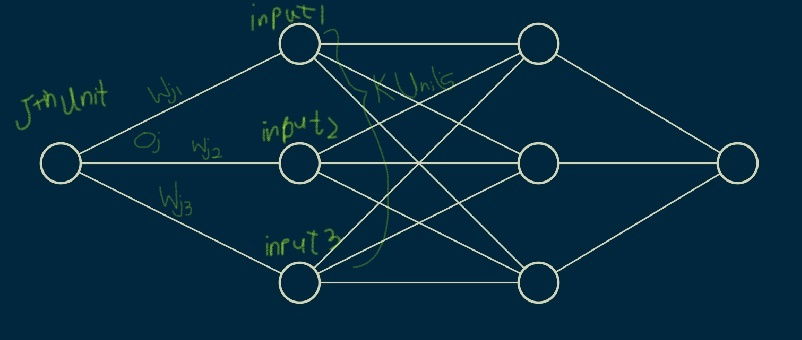

So, how do we find $\frac{\partial E}{\partial O_j}$, we decided to split this into multiple parts. 
$$\frac{\partial E}{\partial O_j} = \sum_{l = 1}^k \frac{\partial E}{\partial input_l} \frac{\partial input_l}{\partial O_j}$$

So lets say if we want to take derivative if $input2$ wrt $O_j$, we will get $W_{j2}$ because $input2 = W_{12}+ W_{2}+W_{32}...$.  
Now if we want to take derivative wrt $O_1$, $$\frac{\partial input2 = W_{12}+ W_{22}+W_{32}...}{\partial O_1}$$, we will get $W_{12}$, rest is independent of $O_1$  
So, $$\sum_{l = 1}^k \frac{\partial E}{\partial input_l} \frac{\partial input_l}{\partial O_j}, $$  
  
$$\frac{\partial input_l}{\partial O_j} = W_{jl}$$ where j is no of unit.  
  
And about $\frac{\partial E}{\partial input_l}$, we will split it into two parts.  
$$\frac{\partial E}{\partial O_l} \frac{\partial O_l}{\partial input_l} W_{jl}$$
This is nothing but the multiplication of the first two terms for lth unit which is inputs in the diagram.. 
We are saying ig we can find the first two units for the next layer, using them and multiplying them the weights of the layers, we can get the first term for the jth unit in the particular hidden layer.  
So if I know it for the next layer, we can find it for the one layer before.  
We already know for the last layer.  
Using it, we will find it for the layer before it and so on and we will able to backpropogate the error and update all the weights.  
Thats why it is called **BackPropogation**.
Whhen we are updating the weights, we are doing the backpropogation.
$\frac{\partial E}{\partial O_l} \frac{\partial O_l}{\partial input_l}$ is the first two terms.


# 12. Implementing a general Neural Network
We will have 2 inputs x1 and x2, and a bias(in input layer).  
2 units in the hidden layer and a bias as well and the hidden layer will connect to output.  
We will start with random biases and weights. 
First thing we will do is we will do Forward Propogation and find the output. As we know the output, we can calculate the derivative at output unit.
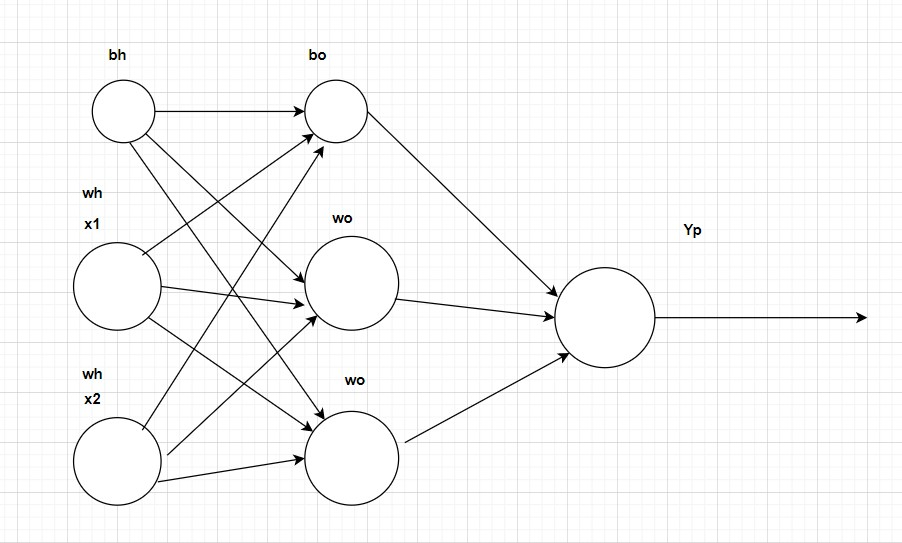  


Now we know the ypred after the forward propogation, we can calcuate the derivative of the Yp unit. 
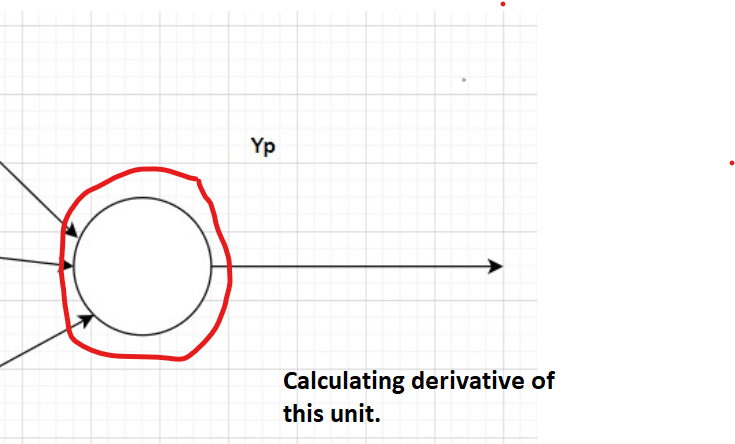

What we meant by this unit is we will find out derivative of error function wrt bias, and both weights (wo).  
Finding derivative wrt a unit in output layer is straight forward. SO we will be able to find the first term, second term and the third term. After finding the terms, we can find the changes need to be done in these particular weights. Now using these three terms, we can find derivative at the output layer. How do we find the derivative at the hidden layer.?  


At the hidden layer, finding the third term and second term is straight forward. To find the first term, the first two terms we have in output layer, we need to pass that back to calculate the first term of the hidden layer. That can be simply achieved by backpropogating using the weights that we have here. Formula for calculating the first two term is $$\frac{\partial E}{\partial O_j} = \sum_{l=1}^k\frac{\partial E}{\partial O_l}\frac{\partial O_l}{\partial input_l} W_{jl}$$  

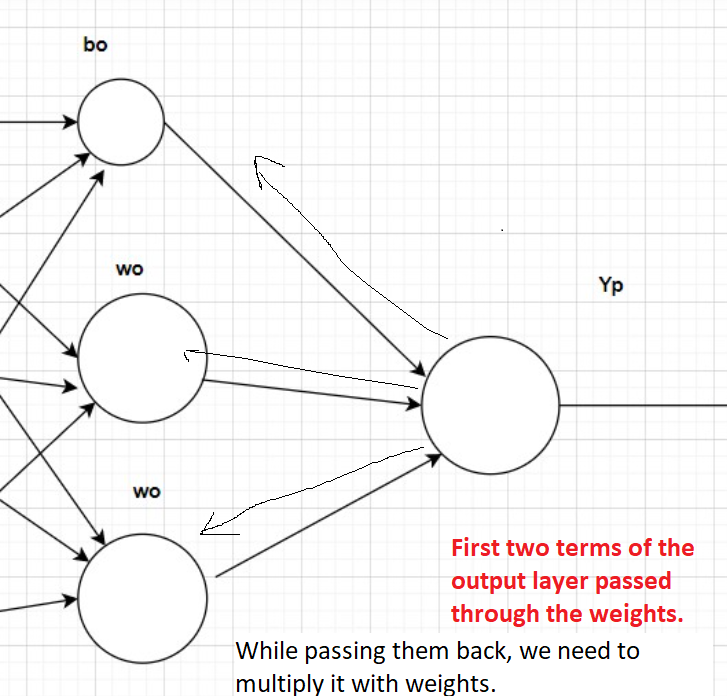

In [3]:
import numpy as np
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([0,1,1,0])

In [4]:
Y = np.array([[0,1,1,0]]).T

In [5]:
def sigmoid(z):
    return 1/ (1+ np.exp(-z))

In [6]:
def derivativeSig(z):
    return sigmoid(z)*(1 - sigmoid(z))

In [7]:
wh = 2 * np.random.random((2,2)) - 1  
                                      
    
bh = 2 * np.random.random((1,2)) - 1  
wo = 2 * np.random.random((2,1)) - 1  
bo = 2 * np.random.random((1,1)) - 1
lr = 0.1


Above function of random biases and weights in neural networks looks like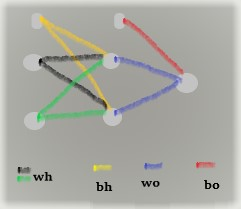

In [ ]:
# for i in range(10000):
#     output0 = X  
#     output = sigmoid(np.dot(output0, weights) + bias)   

#     first_term = output - Y

#     input_for_last_layer = np.dot(output0, weights) + bias

#     second_term = derivativeSig(input_for_last_layer)

#     first_two = first_term * second_term
#     changes= np.dot(output0.T, first_two)  # thats what we need to change instead of a for loop
#     weights = weights - lr*changes
    
#     # in case of bias, again we dont have to write the for loop. 
#     # what we doing in bias is we are adding the four entries in first two.
#     bias_change = np.sum(first_two)
#     bias = bias - lr*bias_change
    

# output = sigmoid(np.dot(X, weights) + bias) # instead of output0, we need to pass X because it is the recent entry after 
#                                             # changing the weights and bias.
    
# weights, bias, output

# # results are almost same as we saw above.  

In [8]:
# forward propogation with one hidden layer
output0 = X    # output of the input layer is X.

# input of the hidden layer where we multiply input(which is output0), weights and add biases.
inputHidden = np.dot(output0, wh) + bh
outputHidden = sigmoid(inputHidden)  # output of the hidden layer is this(applying sigmoid function).

# this is what output layer gets (multiplying with output of hidden layer and its weights and biases).
inputForOutputLayer = np.dot(outputHidden, wo) + bo
output = sigmoid(inputForOutputLayer)  # overall output. 

# dE/Oj = yt - yp
first_term_output_layer = output - Y
# taking derivative of output layer as we discussed.
second_term_output_layer = derivativeSig(inputForOutputLayer)

# calculating two terms of output layer for calculating first term of hidden layer.
first_two_output_layer = first_term_output_layer * second_term_output_layer

# now we know first two terms of output layer, now we will find first two terms of hidden layer.  
# for that we will backpropogate the firsttwo term of output layer and multiply its weights of the output layer and pass it 
# into hidden layer to find the first term of hidden layer.

first_term_hidden_layer = np.dot(first_two_output_layer, wo.T)
second_term_hidden_layer = derivativeSig(inputHidden)

# calculating first two terms of hidden layer.
first_two_hidden_layer = first_term_hidden_layer * second_term_hidden_layer


# changes : we calculated the changes by calculating the dot product of the previous layer and first two term of the output.  

# changes at the output layer
changes_output = np.dot(outputHidden.T, first_two_output_layer)

# changes in bias of output layer
changes_output_bias = np.sum(first_two_output_layer,axis = 0, keepdims = True) # if we add this, it will give you a single 
                                                                            #number but 
                                                                      # we want to do a vector operation.  
                                                                      # So we want to keep the dimensions so that when we are
                                                                      # adding it to the bias, it keeps the same dimension. 
                                                                      # Axis for which axis it wants to do the summation. 


# changes at the hidden layer
changes_hidden = np.dot(output0.T, first_two_hidden_layer)

# changes in bias of hidden layer
changes_hidden_bias = np.sum(first_two_hidden_layer,axis = 0, keepdims = True)


# changing the weights of output layer
wo = wo - lr* changes_output 
# changing the bias of output layer
bo = bo - lr*changes_output_bias  

# changing the weights of hidden layer
wh = wh - lr* changes_hidden 
# changing the bias of hidden layer
bh = bh - lr*changes_hidden_bias    



**Now we need to run this code multiple times and need to find the output after running it.**

In [9]:
for iter in range(10000):
    output0 = X    

    inputHidden = np.dot(output0, wh) + bh
    outputHidden = sigmoid(inputHidden)  

    inputForOutputLayer = np.dot(outputHidden, wo) + bo
    output = sigmoid(inputForOutputLayer)  # overall output. 


    first_term_output_layer = output - Y
    second_term_output_layer = derivativeSig(inputForOutputLayer)
    first_two_output_layer = first_term_output_layer * second_term_output_layer



    first_term_hidden_layer = np.dot(first_two_output_layer, wo.T)
    second_term_hidden_layer = derivativeSig(inputHidden)
    first_two_hidden_layer = first_term_hidden_layer * second_term_hidden_layer
 


    changes_output = np.dot(outputHidden.T, first_two_output_layer)
    changes_output_bias = np.sum(first_two_output_layer,axis = 0, keepdims = True)

                    
    changes_hidden = np.dot(output0.T, first_two_hidden_layer)
    changes_hidden_bias = np.sum(first_two_hidden_layer,axis = 0, keepdims = True)


    wo = wo - lr* changes_output 
    bo = bo - lr*changes_output_bias  

    wh = wh - lr* changes_hidden 
    bh = bh - lr*changes_hidden_bias    

output0 = X    

inputHidden = np.dot(output0, wh) + bh
outputHidden = sigmoid(inputHidden)  

inputForOutputLayer = np.dot(outputHidden, wo) + bo
output = sigmoid(inputForOutputLayer) 

output , wh, bh, wo, bo

(array([[0.0582077 ],
        [0.94751241],
        [0.94752203],
        [0.05547788]]),
 array([[5.48226039, 3.95529266],
        [5.47935185, 3.95444916]]),
 array([[-2.30300806, -6.07513727]]),
 array([[ 7.49482524],
        [-7.98051637]]),
 array([[-3.4465451]]))

We are getting close output